In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
host = 'localhost'
port = 8086
user = 'root'
password = 'root'
dbname = 'VirtualBuilding'
client = DataFrameClient(host, port, user, password, dbname)

In [4]:
tmp=client.query('select * from Temperature')
print(tmp)
tmp['Temperature']

defaultdict(<class 'list'>, {'Temperature':                                   location  node     value
2013-11-28 12:51:19+00:00  VirtualBuilding  T_ex   8.00000
2013-11-28 12:51:19+00:00  VirtualBuilding  T_in  24.34512
2013-11-28 13:25:32+00:00  VirtualBuilding  T_ex   8.00000
2013-11-28 13:25:32+00:00  VirtualBuilding  T_in  24.31374
2013-11-28 13:33:08+00:00  VirtualBuilding  T_ex   8.00000
...                                    ...   ...       ...
2014-12-17 16:04:58+00:00  VirtualBuilding  T_in  22.43136
2014-12-17 16:11:00+00:00  VirtualBuilding  T_ex   9.00000
2014-12-17 16:11:00+00:00  VirtualBuilding  T_in  22.43136
2014-12-17 16:17:04+00:00  VirtualBuilding  T_ex   9.00000
2014-12-17 16:17:04+00:00  VirtualBuilding  T_in  22.43136

[96384 rows x 3 columns]})


,location,node,value
2013-11-28 12:51:19+00:00,VirtualBuilding,T_ex,8.00000
2013-11-28 12:51:19+00:00,VirtualBuilding,T_in,24.34512
2013-11-28 13:25:32+00:00,VirtualBuilding,T_ex,8.00000
2013-11-28 13:25:32+00:00,VirtualBuilding,T_in,24.31374
2013-11-28 13:33:08+00:00,VirtualBuilding,T_ex,8.00000
...,...,...,...
2014-12-17 16:04:58+00:00,VirtualBuilding,T_in,22.43136
2014-12-17 16:11:00+00:00,VirtualBuilding,T_ex,9.00000
2014-12-17 16:11:00+00:00,VirtualBuilding,T_in,22.43136
2014-12-17 16:17:04+00:00,VirtualBuilding,T_ex,9.00000


In [5]:
df = tmp['Temperature'].pivot(columns='node',values='value') 


In [6]:
df.columns
df

node,T_ex,T_in
2013-11-28 12:51:19+00:00,8.0,24.34512
2013-11-28 13:25:32+00:00,8.0,24.31374
2013-11-28 13:33:08+00:00,8.0,24.28236
2013-11-28 13:44:06+00:00,8.0,24.34510
2013-11-28 13:48:22+00:00,8.0,24.34510
...,...,...
2014-12-17 15:46:27+00:00,9.0,22.39998
2014-12-17 15:58:55+00:00,9.0,22.43136
2014-12-17 16:04:58+00:00,9.0,22.43136
2014-12-17 16:11:00+00:00,9.0,22.43136


In [7]:
tmp=client.query('select * from Power')
tmp['Power']

,location,node,value
2013-11-28 12:51:19+00:00,VirtualBuilding,Power,26.718750
2013-11-28 13:25:32+00:00,VirtualBuilding,Power,26.830357
2013-11-28 13:33:08+00:00,VirtualBuilding,Power,26.316964
2013-11-28 13:44:06+00:00,VirtualBuilding,Power,26.651786
2013-11-28 13:48:22+00:00,VirtualBuilding,Power,26.250000
...,...,...,...
2014-12-17 15:46:27+00:00,VirtualBuilding,Power,18.303571
2014-12-17 15:58:55+00:00,VirtualBuilding,Power,18.750000
2014-12-17 16:04:58+00:00,VirtualBuilding,Power,17.633929
2014-12-17 16:11:00+00:00,VirtualBuilding,Power,18.526786


In [8]:
df['Power']=tmp['Power'].value[:len(df)]
df.head()

node,T_ex,T_in,Power
2013-11-28 12:51:19+00:00,8.0,24.34512,26.718750
2013-11-28 13:25:32+00:00,8.0,24.31374,26.830357
2013-11-28 13:33:08+00:00,8.0,24.28236,26.316964
2013-11-28 13:44:06+00:00,8.0,24.34510,26.651786
2013-11-28 13:48:22+00:00,8.0,24.34510,26.250000


In [9]:
df['deltaT']=df.T_in-df.T_ex
df.head()

node,T_ex,T_in,Power,deltaT
2013-11-28 12:51:19+00:00,8.0,24.34512,26.718750,16.34512
2013-11-28 13:25:32+00:00,8.0,24.31374,26.830357,16.31374
2013-11-28 13:33:08+00:00,8.0,24.28236,26.316964,16.28236
2013-11-28 13:44:06+00:00,8.0,24.34510,26.651786,16.34510
2013-11-28 13:48:22+00:00,8.0,24.34510,26.250000,16.34510


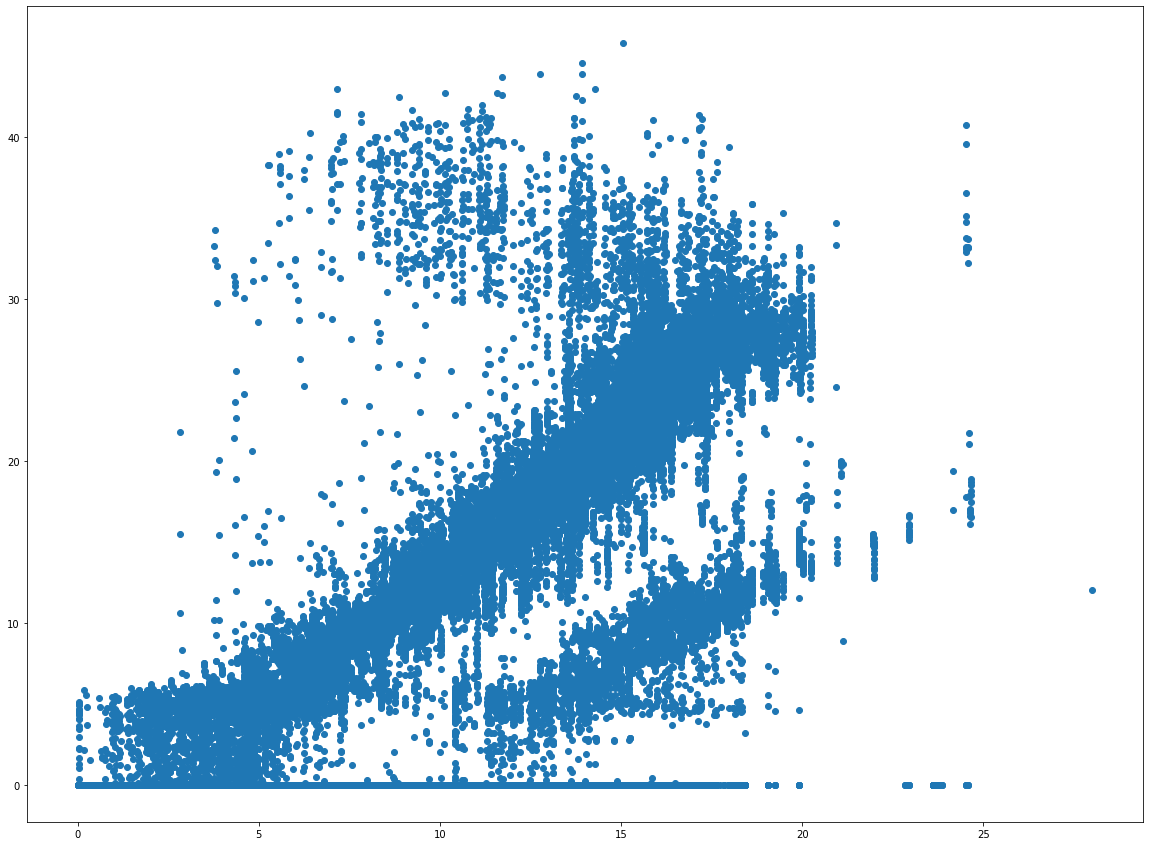

In [10]:
plt.scatter(df.deltaT,df.Power)

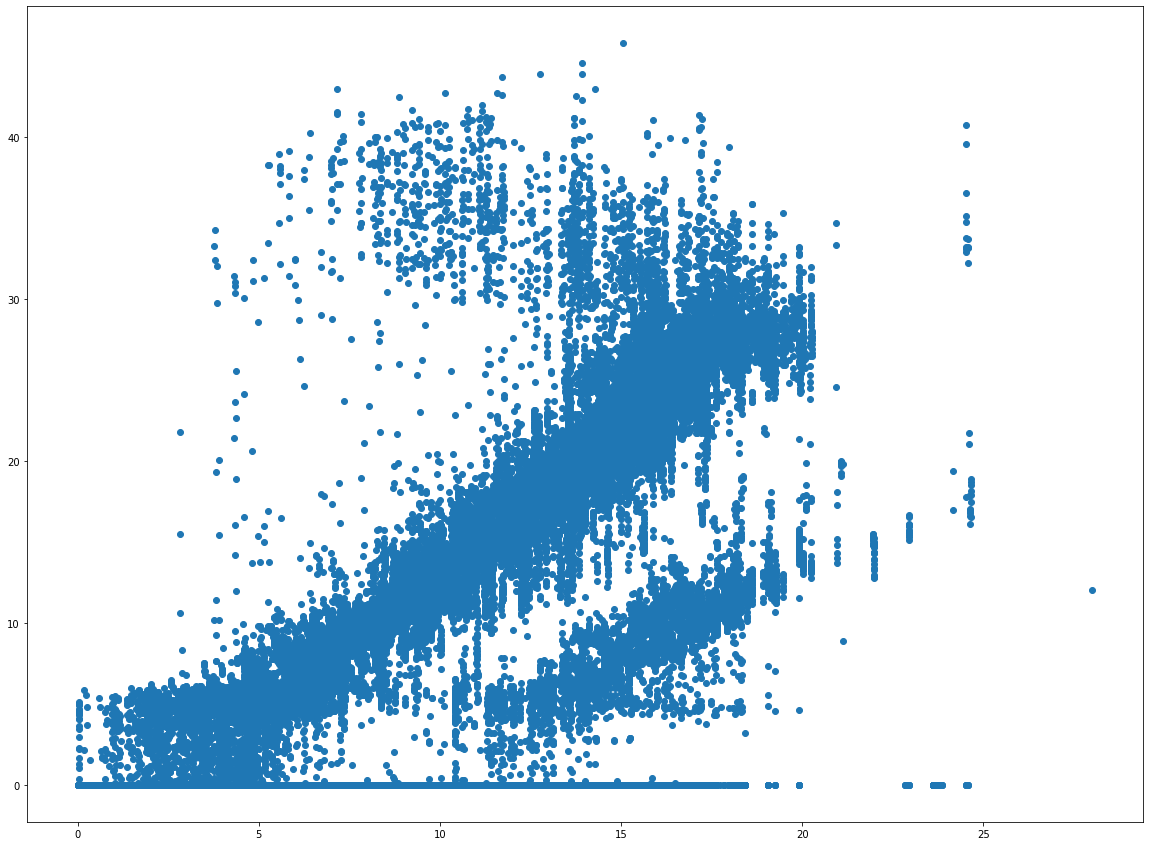

In [11]:
plt.scatter(df.deltaT,df.Power)

In [12]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [13]:
results=model.fit()

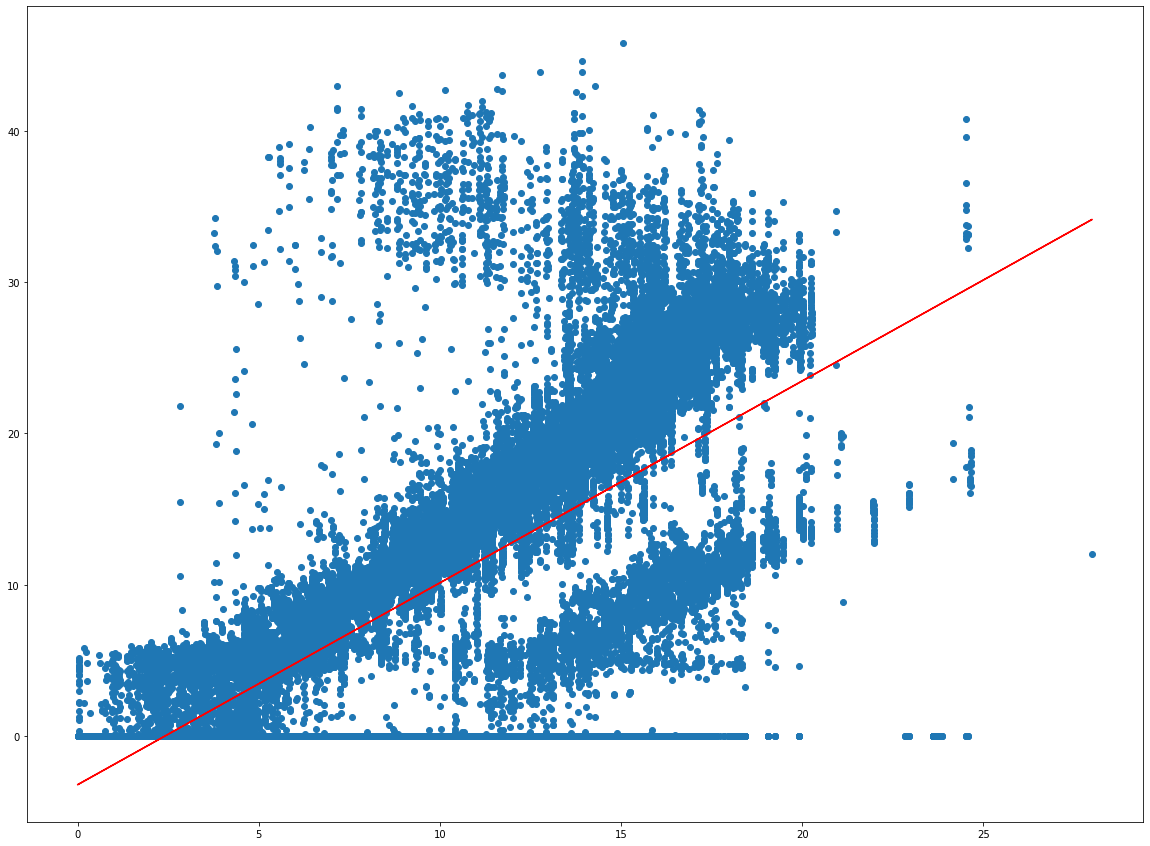

In [14]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 3.658e+04
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:12:33   Log-Likelihood:            -1.6537e+05
No. Observations:               48192   AIC:                         3.307e+05
Df Residuals:                   48190   BIC:                         3.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2228      0.083    -38.810      0.000      -3.386      -3.060
deltaT         1.3347      0.007    191.260      0.000       1.321       1.348
==============================================================================
Omnibus:                     1566.559   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4410.217
Skew:                          -0.016   Prob(JB):                         0.00
Kurtosis:                       4.482   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df=df.resample('H').mean()
df=df.dropna()

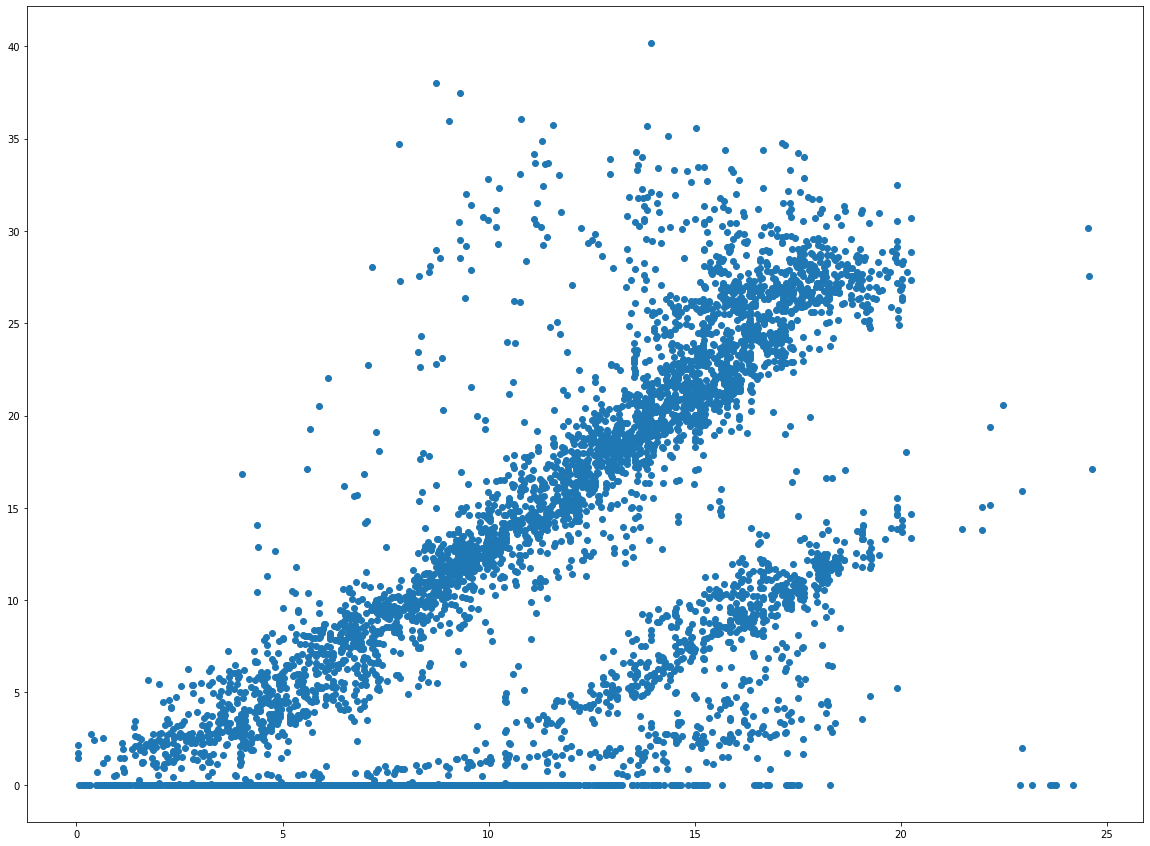

In [17]:
plt.scatter(df.deltaT,df.Power)

In [19]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [20]:
results=model.fit()

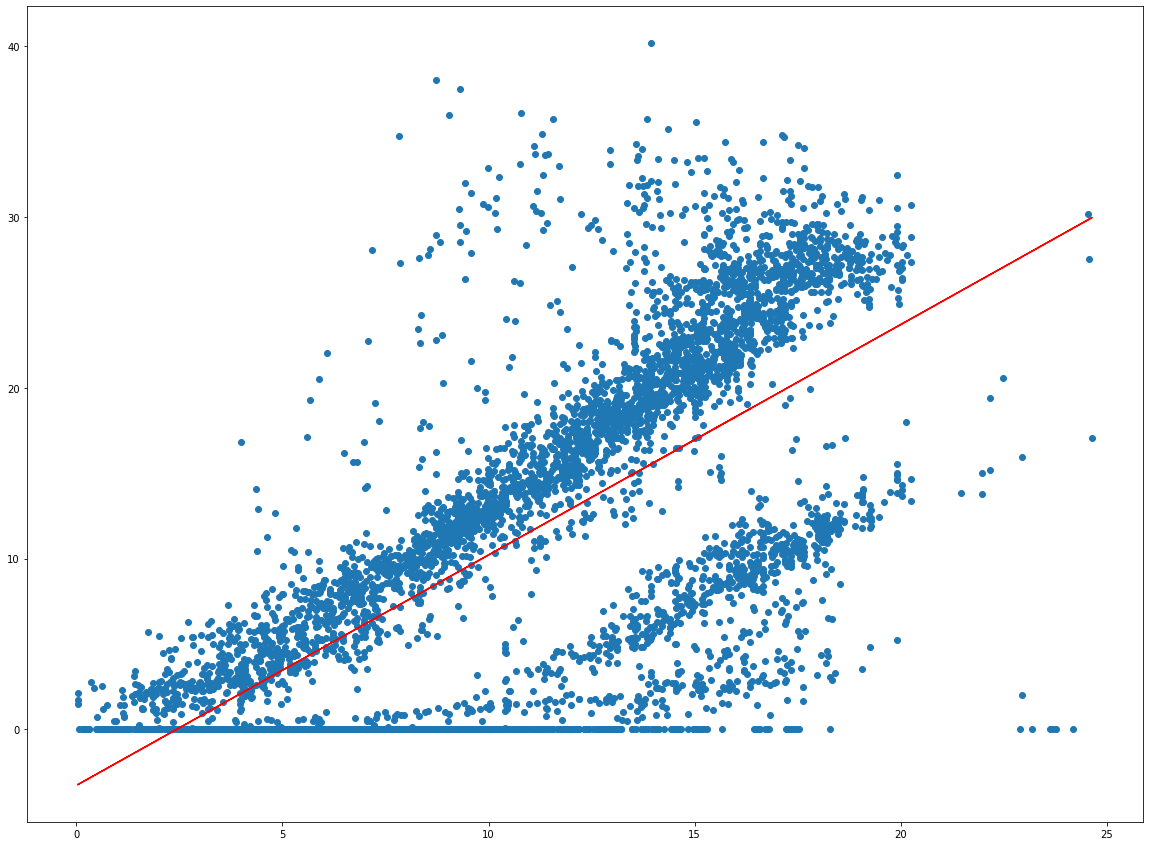

In [21]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     4701.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:12:57   Log-Likelihood:                -18535.
No. Observations:                5472   AIC:                         3.707e+04
Df Residuals:                    5470   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2870      0.240    -13.705      0.000      -3.757      -2.817
deltaT         1.3493      0.020     68.563      0.000       1.311       1.388
==============================================================================
Omnibus:                      136.328   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.284
Skew:                          -0.367   Prob(JB):                     2.32e-33
Kurtosis:                       3.347   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df=df.resample('D').mean()
df=df.dropna()

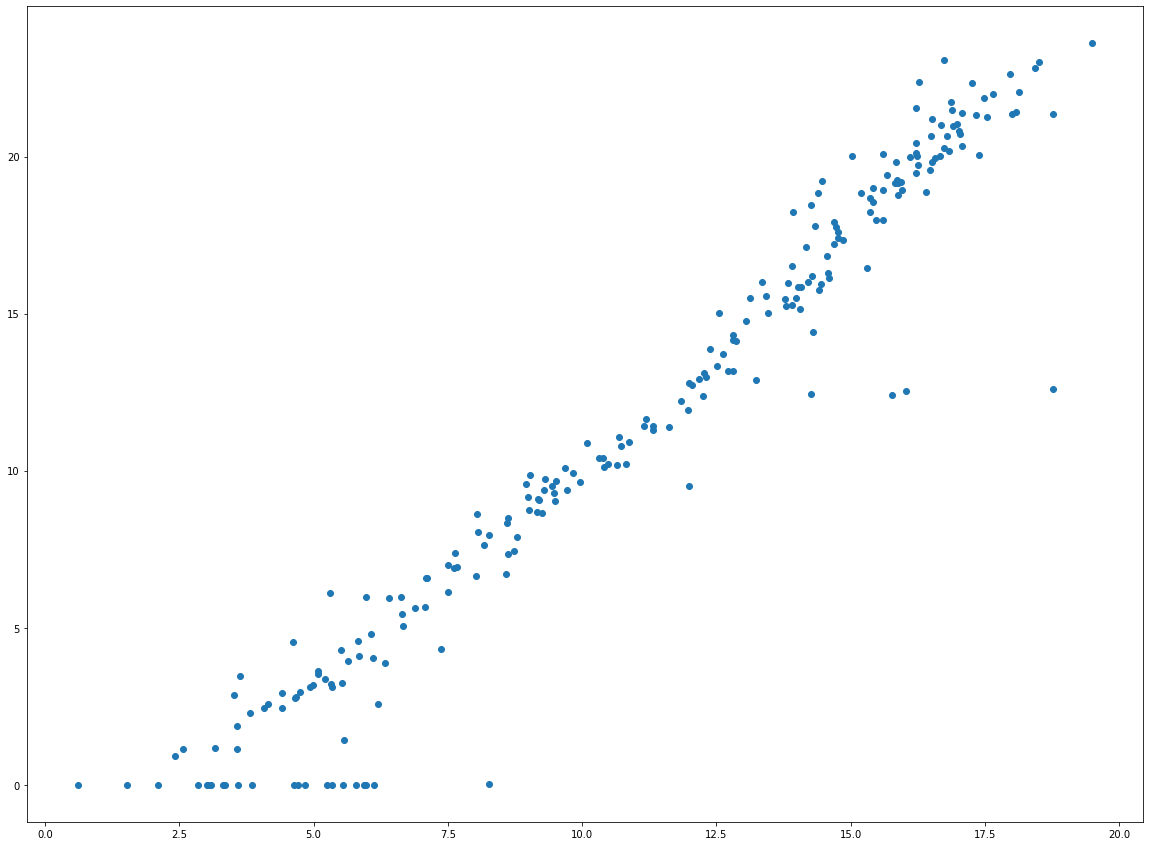

In [24]:
plt.scatter(df.deltaT,df.Power)

In [25]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [26]:
results=model.fit()

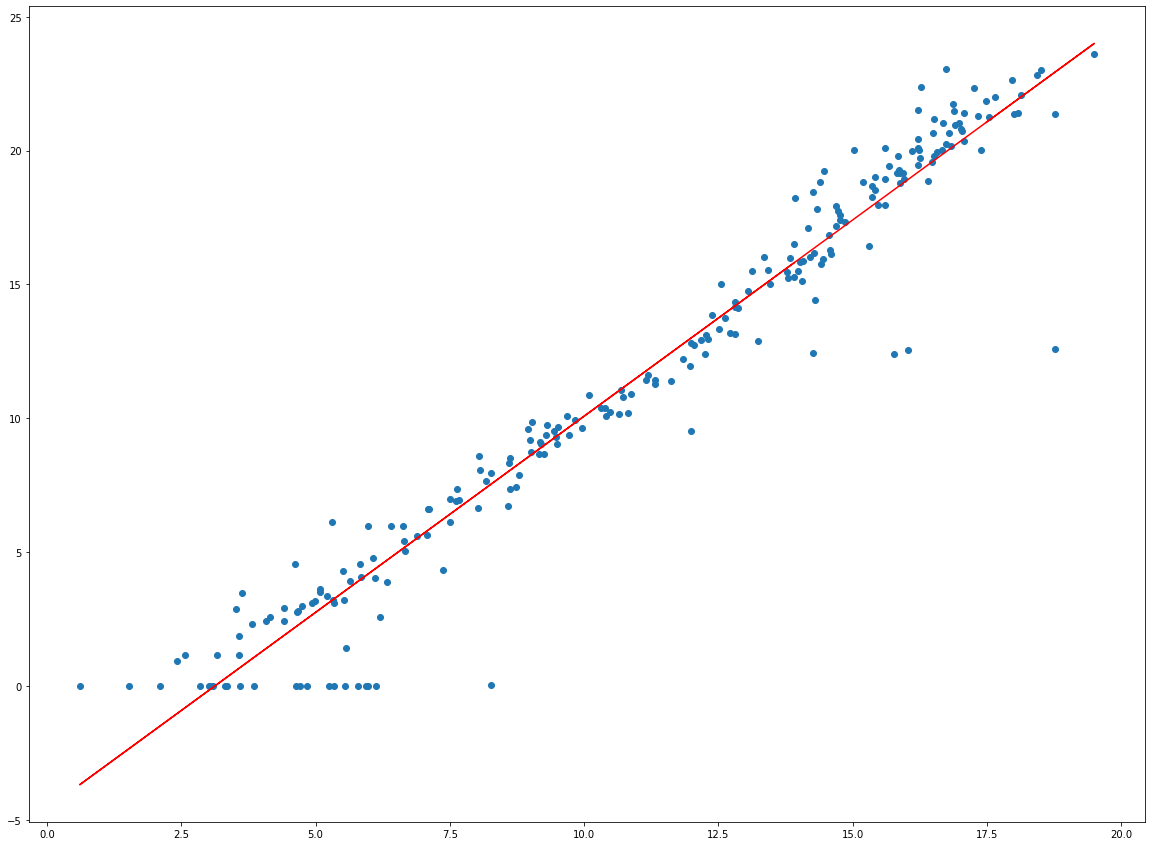

In [27]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4297.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          2.98e-151
Time:                        17:12:59   Log-Likelihood:                -442.87
No. Observations:                 233   AIC:                             889.7
Df Residuals:                     231   BIC:                             896.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5836      0.270    -17.005      0.000      -5.115      -4.052
deltaT         1.4664      0.022     65.549      0.000       1.422       1.510
==============================================================================
Omnibus:                      140.688   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.676
Skew:                          -2.275   Prob(JB):                    1.24e-253
Kurtosis:                      12.963   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df=df.resample('W').mean()
df=df.dropna()

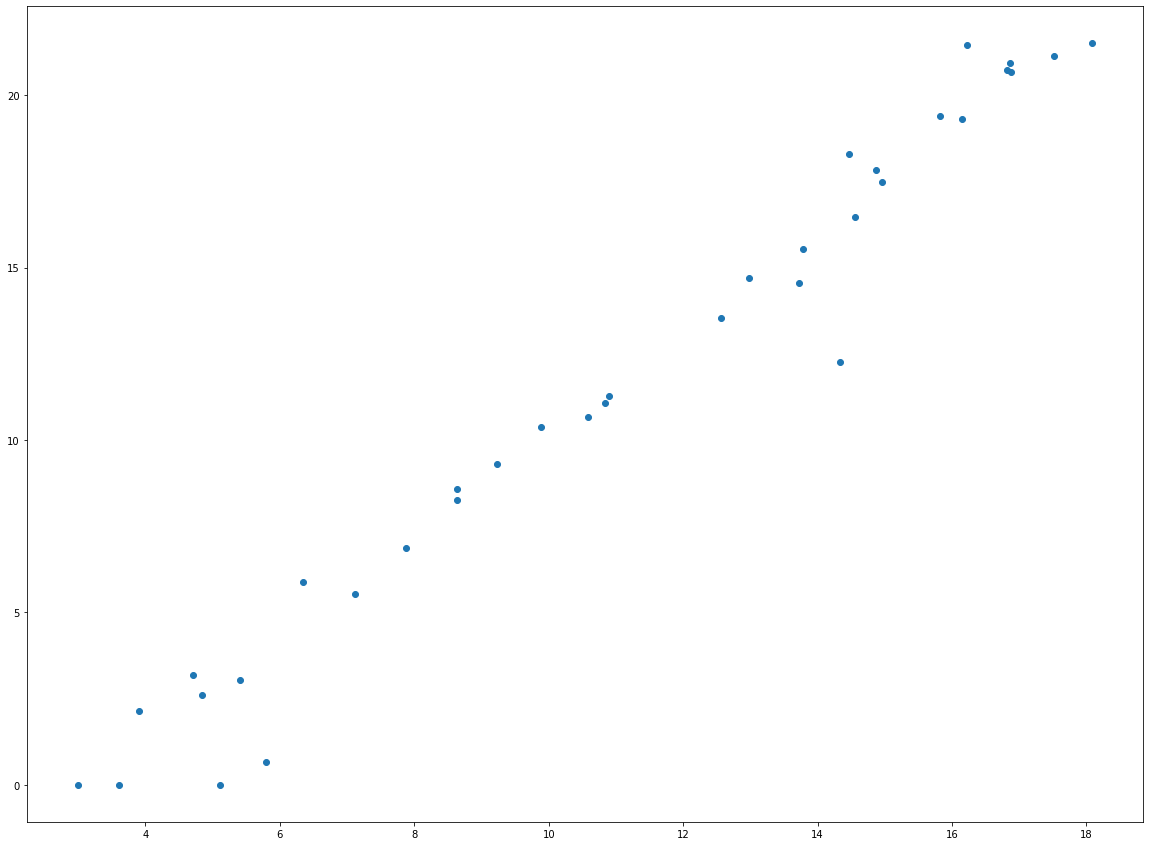

In [30]:
plt.scatter(df.deltaT,df.Power)


In [31]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [32]:
results=model.fit()

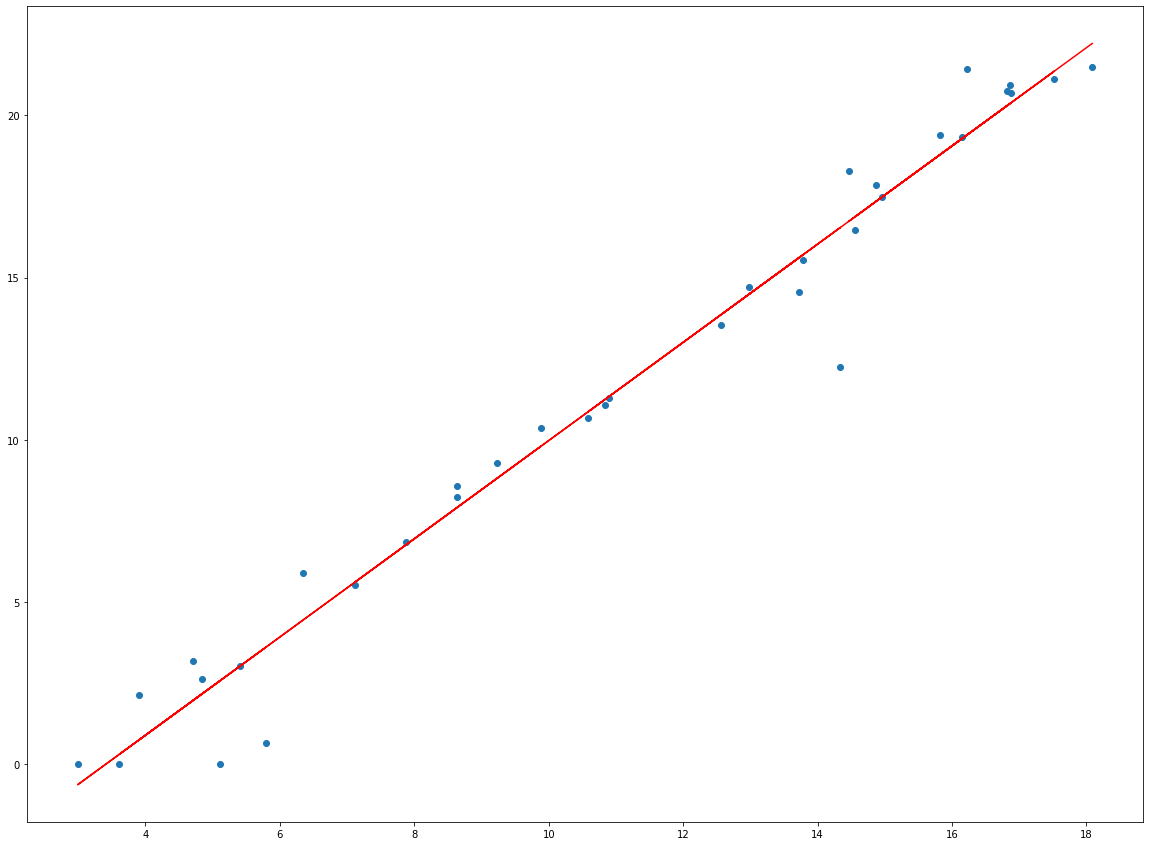

In [33]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.21e-27
Time:                        17:13:01   Log-Likelihood:                -56.267
No. Observations:                  35   AIC:                             116.5
Df Residuals:                      33   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1572      0.541     -9.539      0.000      -6.257      -4.057
deltaT         1.5136      0.045     33.602      0.000       1.422       1.605
==============================================================================
Omnibus:                       22.376   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.659
Skew:                          -1.660   Prob(JB):                     1.81e-08
Kurtosis:                       6.664   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""